# K-Nearest Neighbors (Euclidean distance)

Im folgendem wird ein Machine Learning Klassifizierungsproblem mithilfe des `K-Nearest-Neighbors` gelöst. <br />
Als distanzbestimmungsformel wird die `euclidean distance` genutzt.

Als Datenset wird das Iris Datenset genutzt. Wichtig hierbei, ist die analogie der Pflanze:

![test](https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg)


Dataset basiert auf https://gist.github.com/nafiul-nipu/c46c3297aec7843016359a98467b17d3

In [26]:
import pandas as pd
import numpy

In [27]:
# CSV Datei einlesen und auf ein 2D Array mappen
iris_dataset_file = pd.read_csv("iris_dataset.csv", sep=",", header=None)

# Ersten 5 Reihen ausgeben um Werte anzusehen
print(iris_dataset_file.head(5))

iris_dataset = iris_dataset_file.values

# Erste Zeile aus dem Datenset in eine separate Variable abspeichern
feature_names = iris_dataset[0]

# Alle weiteren Reihen in die Variable iris_dataset abspeichern
iris_dataset = iris_dataset[1:]

              0            1             2            3        4
0  sepal_length  sepal_width  petal_length  petal_width  species
1           5.1          3.5           1.4          0.2   setosa
2           4.9          3.0           1.4          0.2   setosa
3           4.7          3.2           1.3          0.2   setosa
4           4.6          3.1           1.5          0.2   setosa


In [28]:
print(iris_dataset)

[['5.1' '3.5' '1.4' '0.2' 'setosa']
 ['4.9' '3.0' '1.4' '0.2' 'setosa']
 ['4.7' '3.2' '1.3' '0.2' 'setosa']
 ['4.6' '3.1' '1.5' '0.2' 'setosa']
 ['5.0' '3.6' '1.4' '0.2' 'setosa']
 ['5.4' '3.9' '1.7' '0.4' 'setosa']
 ['4.6' '3.4' '1.4' '0.3' 'setosa']
 ['5.0' '3.4' '1.5' '0.2' 'setosa']
 ['4.4' '2.9' '1.4' '0.2' 'setosa']
 ['4.9' '3.1' '1.5' '0.1' 'setosa']
 ['5.4' '3.7' '1.5' '0.2' 'setosa']
 ['4.8' '3.4' '1.6' '0.2' 'setosa']
 ['4.8' '3.0' '1.4' '0.1' 'setosa']
 ['4.3' '3.0' '1.1' '0.1' 'setosa']
 ['5.8' '4.0' '1.2' '0.2' 'setosa']
 ['5.7' '4.4' '1.5' '0.4' 'setosa']
 ['5.4' '3.9' '1.3' '0.4' 'setosa']
 ['5.1' '3.5' '1.4' '0.3' 'setosa']
 ['5.7' '3.8' '1.7' '0.3' 'setosa']
 ['5.1' '3.8' '1.5' '0.3' 'setosa']
 ['5.4' '3.4' '1.7' '0.2' 'setosa']
 ['5.1' '3.7' '1.5' '0.4' 'setosa']
 ['4.6' '3.6' '1.0' '0.2' 'setosa']
 ['5.1' '3.3' '1.7' '0.5' 'setosa']
 ['4.8' '3.4' '1.9' '0.2' 'setosa']
 ['5.0' '3.0' '1.6' '0.2' 'setosa']
 ['5.0' '3.4' '1.6' '0.4' 'setosa']
 ['5.2' '3.5' '1.5' '0.2' 's

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def normalize(raw_x: numpy.ndarray) -> numpy.ndarray:
    normalized = raw_x

    max_number = float(numpy.amax(raw_x))
    min_number = float(numpy.amin(raw_x))

    print(len(raw_x))

    print(max_number)
    print(min_number)

    for row_index, row in enumerate(raw_x):
        for index, value in enumerate(row):
            normalized[row_index, index] = (float(value) - min_number) / (max_number - min_number)

    return normalized



X = iris_dataset[:, 0:4]
# min = find_min(X)

normalized = normalize(X)
print(normalized[0])


# In Machine Learning Context steht groß X für die tatsächlichen Daten und
# y für die Zuordnung.

# Wir nutzen hier "StandardScaler().fit_transform" um die Daten zu normalisieren (Nur Werte zwischen 0 und 1)
X = StandardScaler().fit_transform(iris_dataset[:, 0:4])
print(X[0])
y = iris_dataset[:, 4]

# Datenset in trainings- und testdaten trennen. Test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

150
1.0
0.0
[0.641025641025641 0.43589743589743585 0.16666666666666663
 0.01282051282051282]
[-0.90068117  1.03205722 -1.3412724  -1.31297673]


In [30]:
# Testen ob in X wirklich nur Werte und keine Klassifizierungen mehr stehen
print(X_test[0:5])

[[0.8333333333333333 0.37179487179487175 0.5512820512820513
  0.16666666666666663]
 [0.8717948717948718 0.3846153846153846 0.6153846153846154
  0.17948717948717946]
 [0.8076923076923077 0.3333333333333333 0.6666666666666666
  0.23076923076923073]
 [0.9743589743589743 0.4743589743589743 0.8461538461538461
  0.2692307692307692]
 [0.6153846153846154 0.37179487179487175 0.16666666666666663
  0.01282051282051282]]


In [31]:
# print first dataset of the iris dataset
example_data = X_train[0]

print(f"Classification: \"{y_train[0]}\"")
print("--------------")

for index, data_point in enumerate(example_data):
    print(feature_names[index] + f":  {data_point}")

Classification: "setosa"
--------------
sepal_length:  0.5897435897435898
sepal_width:  0.3974358974358974
petal_length:  0.15384615384615383
petal_width:  0.01282051282051282


In [32]:
import matplotlib.pyplot as plt

COLORS = {
    "setosa": "r",
    "virginica": "g",
    "versicolor": "b"
}

def show_graph(feature_one: int, feature_two: int, X_dataset: numpy.ndarray, y_labels: numpy.ndarray):
    fig, ax = plt.subplots()

    for index, data in enumerate(X_dataset):
        classification = y_labels[index]
        ax.scatter(data[feature_one], data[feature_two], color=COLORS[classification])

    # set a title and labels
    ax.set_xlabel(feature_names[feature_one])
    ax.set_ylabel(feature_names[feature_two])

    plt.show()

## Trainingsdaten Validierung

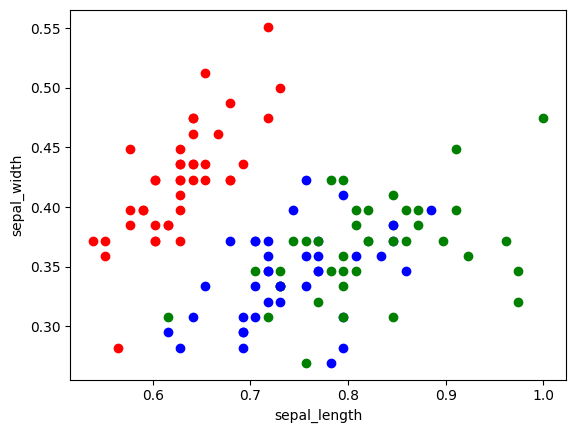

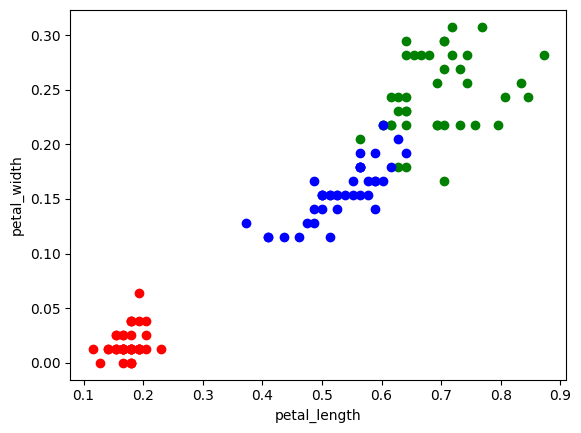

In [33]:
show_graph(0, 1, X_train, y_train)
show_graph(2, 3, X_train, y_train)

## Testdaten Visualisierung


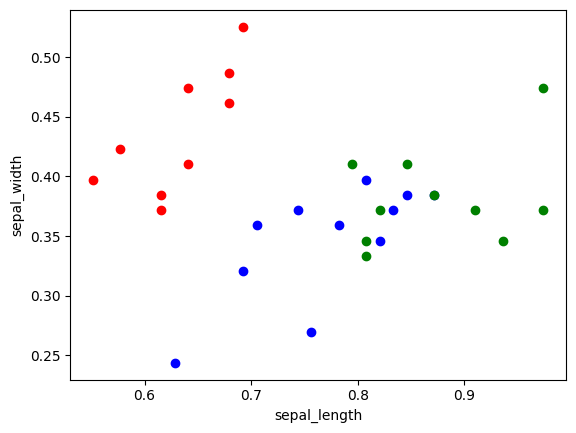

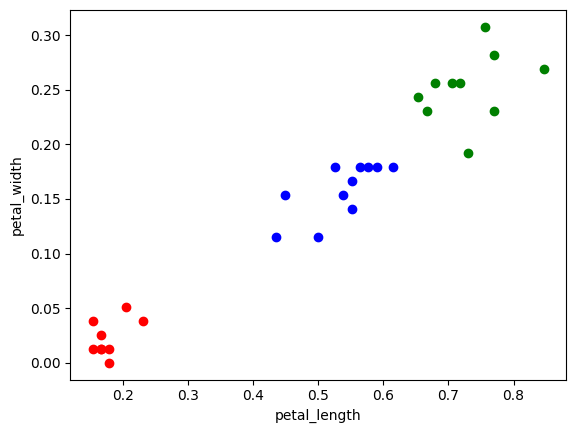

In [34]:
show_graph(0, 1, X_test, y_test)
show_graph(2, 3, X_test, y_test)

## Vorhersage und Algorithmusimplementation

Beim ausgeben der Daten ist also ein klarer Zusammenhang zwischen den Features (sepal/petal width & length) ersichtlich.

Klare Klassifizierung der Daten möglich!

Um nun einen neuen Datenpunk einer bestimmten Klasse zuzuordnen, betrachten wir die anliegenden Nachbaren.

<img src="https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.l-retina.ts=1639762044031.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/intro/complex_narrative/items/content_group/image" width="700" />


Zur berechnung der Distanz zwischen diesen Datenpunkten wird die `euclidean distance` Formel genutzt, die wie folgt lautet:

$$d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $$

Wobei in diesem Datenset n = 4 gilt. Also hat jeder Datenpunkt 4 Dimensionen:

$$p = P({x}_{1}, {x}_{2}, {x}_{3}, {x}_{4})$$
$$q = P({x}_{1}, {x}_{2}, {x}_{3}, {x}_{4})$$

In [35]:
import math

def euclidean_distance(p: numpy.ndarray, q: numpy.ndarray) -> float:
    distance = 0

    for dimension in range(q.size - 1):
        distance += (q[dimension] - p[dimension])**2

    return math.sqrt(distance)

In [36]:
class KNearestNeighborsClassifier():
    def __init__(self, k: int, X_train, y_train):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train

    def set_k(self, k: int):
        self.k = k

    def predict(self, X_sample: numpy.ndarray) -> str:
        distances = []
        for index, training_row in enumerate(self.X_train):
            calculated_distance = euclidean_distance(X_sample, training_row)
            distances.append((self.y_train[index], calculated_distance))

        distances.sort(key=lambda element: element[1])
        neighbors = []

        for index in range(self.k):
            neighbors.append(distances[index][0])

        prediction = max(neighbors)

        return prediction

    def evaluate(self, X_test: numpy.ndarray, y_test: numpy.ndarray) -> float:
        accurate_count = 0

        for index, X_sample in enumerate(X_test):
            prediction = self.predict(X_sample)

            if prediction is y_test[index]:
                accurate_count += 1

        accuracy = (accurate_count / float(len(X_test)))

        return accuracy

In [37]:
knn = KNearestNeighborsClassifier(5, X_train, y_train)

In [38]:
print(f"Overall accuracy: {knn.evaluate(X_test, y_test):.2%}")

Overall accuracy: 93.33%


Best k: 0


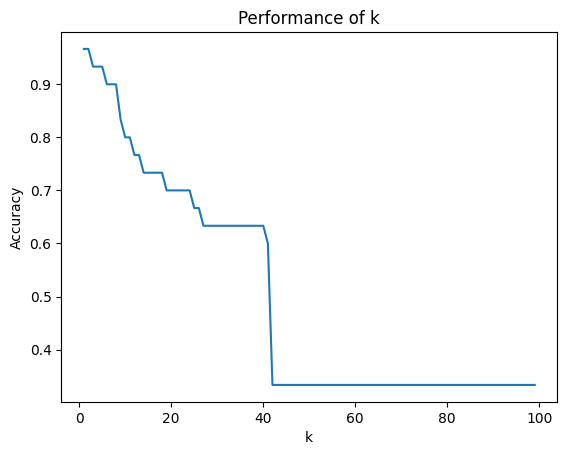

In [39]:
# Funktion definiert zur Ermittlung des besten k-Wertes
def find_best_k(k_values: range):
    accuracies = []
    for k in k_values:
        knn.set_k(k)
        accuracy = knn.evaluate(X_test, y_test)
        accuracies.append(accuracy)

    return accuracies

# Besten K Wert ermitteln
k_values = range(1, 100)
accuracies = find_best_k(k_values)
best_k = accuracies.index(max(accuracies))
print(f"Best k: {best_k}")

# Graph zeichnen
fig, ax = plt.subplots()
ax.plot(k_values, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of k")
plt.show()

In [40]:
import random


random_index = random.randint(0, len(X_test) - 1)

X_sample = X_test[random_index]
knn.set_k(22)

prediction = knn.predict(X_sample)

print(f"Unclassified data: {X_sample}")
print(f"Prediction: {prediction}")
print(f"Actual: {y_test[random_index]}")

Unclassified data: [0.7564102564102564 0.2692307692307692 0.49999999999999994
 0.11538461538461538]
Prediction: versicolor
Actual: versicolor
